In [ ]:
!pip install -U transformers
!pip install -U pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.3/162.3 kB 8.1 MB/s eta 0:00:00


## Local Inference on GPU
Model page: https://huggingface.co/SamLowe/roberta-base-go_emotions-onnx

⚠️ If the generated code snippets do not work, please open an issue on either the [model repo](https://huggingface.co/SamLowe/roberta-base-go_emotions-onnx)
			and/or on [huggingface.js](https://github.com/huggingface/huggingface.js/blob/main/packages/tasks/src/model-libraries-snippets.ts) 🙏

In [2]:
# Load model directly
from transformers import pipeline

classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

sentences = ["I am not having a great day", "Wow, that's amazing!", "This might be difficult...", "I am going to fucking shred you to pieces."]

model_outputs = classifier(sentences)
for output in model_outputs:
  print(output)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

Device set to use cuda:0


[{'label': 'disappointment', 'score': 0.46669596433639526}, {'label': 'sadness', 'score': 0.3984943926334381}, {'label': 'annoyance', 'score': 0.06806610524654388}, {'label': 'neutral', 'score': 0.05703021585941315}, {'label': 'disapproval', 'score': 0.04423946887254715}, {'label': 'nervousness', 'score': 0.014850739389657974}, {'label': 'realization', 'score': 0.014059904962778091}, {'label': 'approval', 'score': 0.011267454363405704}, {'label': 'joy', 'score': 0.0063033816404640675}, {'label': 'remorse', 'score': 0.006221487186849117}, {'label': 'caring', 'score': 0.006029392126947641}, {'label': 'embarrassment', 'score': 0.005265498533844948}, {'label': 'anger', 'score': 0.004981442354619503}, {'label': 'disgust', 'score': 0.004259037785232067}, {'label': 'grief', 'score': 0.004002132453024387}, {'label': 'confusion', 'score': 0.003382926108315587}, {'label': 'relief', 'score': 0.0031404944602400064}, {'label': 'desire', 'score': 0.0028274687938392162}, {'label': 'admiration', 'scor

In [3]:
import pandas as pd

In [10]:
df = pd.read_csv("NLPCleanData.csv")
print(df)

text_samples = df["Sample"]
authors = df["Author"]

chunked_samples = []
for sample in text_samples:
  x = 500
  res = [sample[y-x:y] for y in range(x, len(sample)+x,x)]
  chunked_samples.append(res)

                        Author  Gender  \
0        Alfred Russel Wallace    Male   
1                   Amy Godine  Female   
2      Charles Fredrick Holder    Male   
3                David Goulson    Male   
4   Frederick Courteney Selous    Male   
5               Greta Thunberg  Female   
6          Henry David Thoreau    Male   
7                 Jane Goodall  Female   
8                Rachel Carson  Female   
9          Robin Wall Kimmerer  Female   
10                Val Plumwood  Female   
11         William T. Hornaday    Male   

                                               Sample  
0   solar heat and light, as entirely unsupported ...  
1   men fought slavery. Its centrality in their li...  
2   houses, or any object that excited its ire, an...  
3   frame as a contender to explain insect decline...  
4   there seems every reason to believe have died ...  
5   to that challenge. But I want to ask you all t...  
6   part of the fruit is lost with the bloom which...  
7   m

Aggregated Emotional Values per Sample:

In [20]:
author_dict = []
count = 0

for sample in chunked_samples:
  model_outputs = classifier(sample)
  aggregate_outputs = {}
  used_labels = []

  for output in model_outputs:
    for score in output:
      if score["label"] not in used_labels:
        used_labels.append(score["label"])

        aggregate_outputs[score["label"]] = score["score"]
      else:
        aggregate_outputs[score["label"]] += score["score"]

  # print(sample)
  for output in aggregate_outputs:
    aggregate_outputs[output] /= len(model_outputs)

  # print(aggregate_outputs)
  author_dict.append({ authors[count] : aggregate_outputs })
  count += 1

print(author_dict)

1
2
3
4
5
6
7
8
9
10
11
12
[{'Alfred Russel Wallace': {'neutral': 0.7961575989921887, 'curiosity': 0.026167103897508544, 'confusion': 0.025535931700142102, 'approval': 0.11501931510865689, 'realization': 0.04733828905348977, 'surprise': 0.0026988774445878033, 'optimism': 0.006871651450637728, 'excitement': 0.0024120461831140952, 'annoyance': 0.007021719430728505, 'admiration': 0.018506151102095223, 'disapproval': 0.009618253295775503, 'disappointment': 0.003985579513634245, 'amusement': 0.0013340319584434232, 'desire': 0.0012015692870287846, 'joy': 0.001377787083038129, 'disgust': 0.012094381735854162, 'love': 0.0013650927944884946, 'caring': 0.0011729567282600327, 'fear': 0.001030170299539653, 'sadness': 0.0012246466775347167, 'embarrassment': 0.0007561866717878729, 'nervousness': 0.00045629904173741427, 'anger': 0.0008355089608812705, 'relief': 0.0007433224935084581, 'gratitude': 0.0008821818041421163, 'remorse': 0.0003417995714698918, 'grief': 0.00027698566530792354, 'pride': 0.0005

In [18]:
print(count)

1


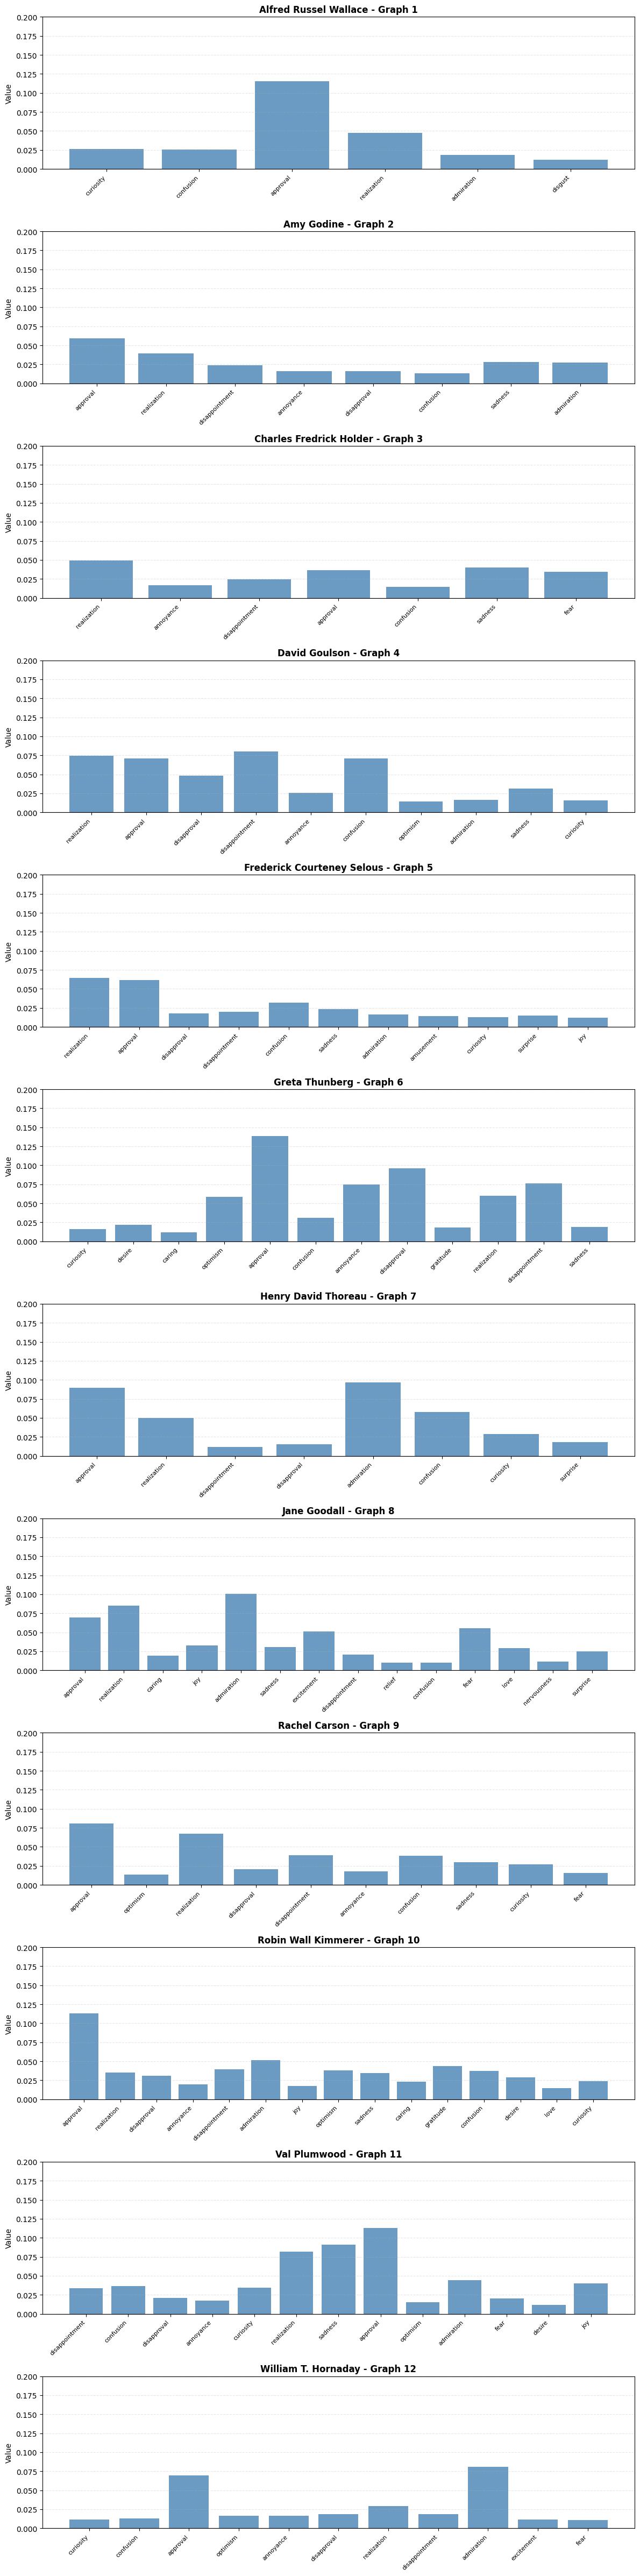

In [25]:
import matplotlib.pyplot as plt
import numpy as np

n_graphs = len(author_dict)
fig, axes = plt.subplots(n_graphs, 1, figsize=(12, 4 * n_graphs))

# If there's only one graph, axes won't be an array
if n_graphs == 1:
    axes = [axes]

# Generate a graph for each dictionary entry
for idx, entry in enumerate(author_dict):
    # Get the key
    key = list(entry.keys())[0]
    emotions_dict = entry[key]

    # Extract emotions and values (excluding 'neutral') (excluding insignificant values)
    emotions = [e for e in emotions_dict.keys() if e != 'neutral' and emotions_dict[e] >= 0.01]
    values = [emotions_dict[e] for e in emotions]

    # Create bar chart
    x_pos = np.arange(len(emotions))
    axes[idx].bar(x_pos, values, color='steelblue', alpha=0.8)

    # Customize the plot
    axes[idx].set_ylabel('Value', fontsize=10)
    axes[idx].set_title(f'{key} - Graph {idx + 1}', fontsize=12, fontweight='bold')
    axes[idx].set_xticks(x_pos)
    axes[idx].set_xticklabels(emotions, rotation=45, ha='right', fontsize=8)
    axes[idx].set_ylim(0, 0.2)
    axes[idx].grid(axis='y', alpha=0.3, linestyle='--')

    # Add horizontal line at y=0 for reference
    axes[idx].axhline(y=0, color='black', linewidth=0.8)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Aggregated Emotional Values, Separated by Gender:

Male Authors:

Alfred Russel Wallace
Charles Fredrick Holder
David Goulson
Frederick Courteney Selous
Henry David Thoreau
William T. Hornaday

Female Authors:

Amy Godine
Greta Thunberg
Jane Goodall
Rachel Carson
Robin Wall Kimmerer
Val Plumwood


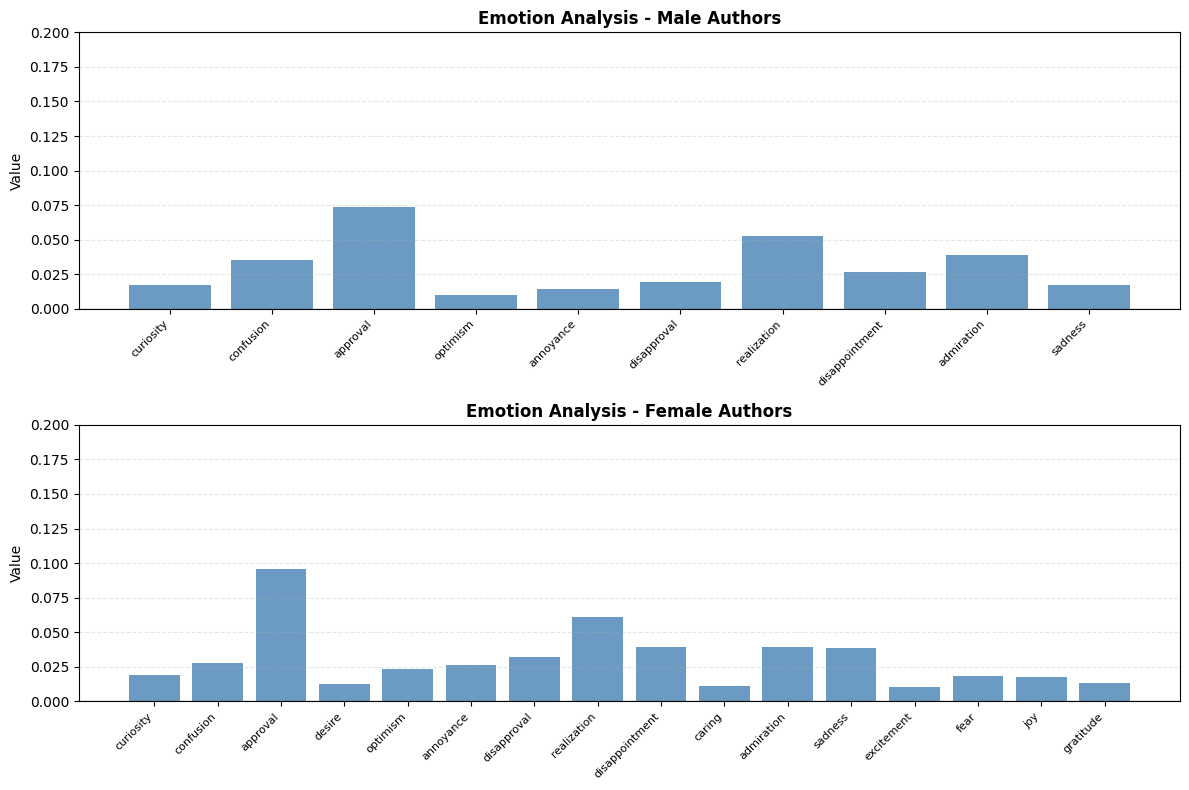

In [38]:
male_authors = []
female_authors = []
df_array = df.to_numpy()

for item in df_array:
  if item[1] == "Male":
    male_authors.append(item[0])
  else:
    female_authors.append(item[0])

print("Male Authors:\n")
for item in male_authors:
  print(item)

print("\nFemale Authors:\n")
for item in female_authors:
  print(item)

male_scores = {}
female_scores = {}
for emotion in used_labels:
  male_scores[emotion] = 0
  female_scores[emotion] = 0

for entry in author_dict:
  for author in entry:
    if author in male_authors:
      for emotion in entry[author]:
        male_scores[emotion] += entry[author][emotion]
    else:
      for emotion in entry[author]:
        female_scores[emotion] += entry[author][emotion]

for emotion in male_scores:
  male_scores[emotion] /= len(male_authors)
  female_scores[emotion] /= len(female_authors)

data = [male_scores, female_scores]

n_graphs = len(data)
fig, axes = plt.subplots(n_graphs, 1, figsize=(12, 4 * n_graphs))

# If there's only one graph, axes won't be an array
if n_graphs == 1:
    axes = [axes]

titles = ['Emotion Analysis - Male Authors', 'Emotion Analysis - Female Authors']

# Generate a graph for each dictionary
for idx, emotions_dict in enumerate(data):
    # Extract emotions and values, excluding 'neutral' and values under 0.01
    emotions = [e for e in emotions_dict.keys() if e != 'neutral' and emotions_dict[e] >= 0.01]
    values = [emotions_dict[e] for e in emotions]

    # Create bar chart
    x_pos = np.arange(len(emotions))
    axes[idx].bar(x_pos, values, color='steelblue', alpha=0.8)

    # Customize the plot
    axes[idx].set_ylabel('Value', fontsize=10)
    axes[idx].set_title(titles[idx], fontsize=12, fontweight='bold')
    axes[idx].set_xticks(x_pos)
    axes[idx].set_xticklabels(emotions, rotation=45, ha='right', fontsize=8)
    axes[idx].set_ylim(0, 0.2)
    axes[idx].grid(axis='y', alpha=0.3, linestyle='--')

    # Add horizontal line at y=0 for reference
    axes[idx].axhline(y=0, color='black', linewidth=0.8)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Individual samples were broken into chunks (500 words); these chunks were each scored. Want to see how emotional values change as samples progress from chunk to chunk.

In [42]:
chunked_model_outputs = []
for sample in chunked_samples:
  model_outputs = classifier(sample)
  chunked_model_outputs.append(model_outputs)

print(chunked_model_outputs)

authors_separated_chunks_scores = {}
for i in range(0, len(df_array)):
  authors_separated_chunks_scores[df_array[i][0]] = chunked_model_outputs[i]

print(authors_separated_chunks_scores)

[[[{'label': 'neutral', 'score': 0.6164257526397705}, {'label': 'curiosity', 'score': 0.27737775444984436}, {'label': 'confusion', 'score': 0.1887313574552536}, {'label': 'approval', 'score': 0.04344891756772995}, {'label': 'realization', 'score': 0.03982266038656235}, {'label': 'surprise', 'score': 0.0303325392305851}, {'label': 'optimism', 'score': 0.01134645938873291}, {'label': 'excitement', 'score': 0.007467065472155809}, {'label': 'annoyance', 'score': 0.00580441951751709}, {'label': 'admiration', 'score': 0.005309076979756355}, {'label': 'disapproval', 'score': 0.004964654799550772}, {'label': 'disappointment', 'score': 0.003206311259418726}, {'label': 'amusement', 'score': 0.0020537551026791334}, {'label': 'desire', 'score': 0.0020506703294813633}, {'label': 'joy', 'score': 0.001912481733597815}, {'label': 'disgust', 'score': 0.0015237870393320918}, {'label': 'love', 'score': 0.001176058896817267}, {'label': 'caring', 'score': 0.0011699097231030464}, {'label': 'fear', 'score': 

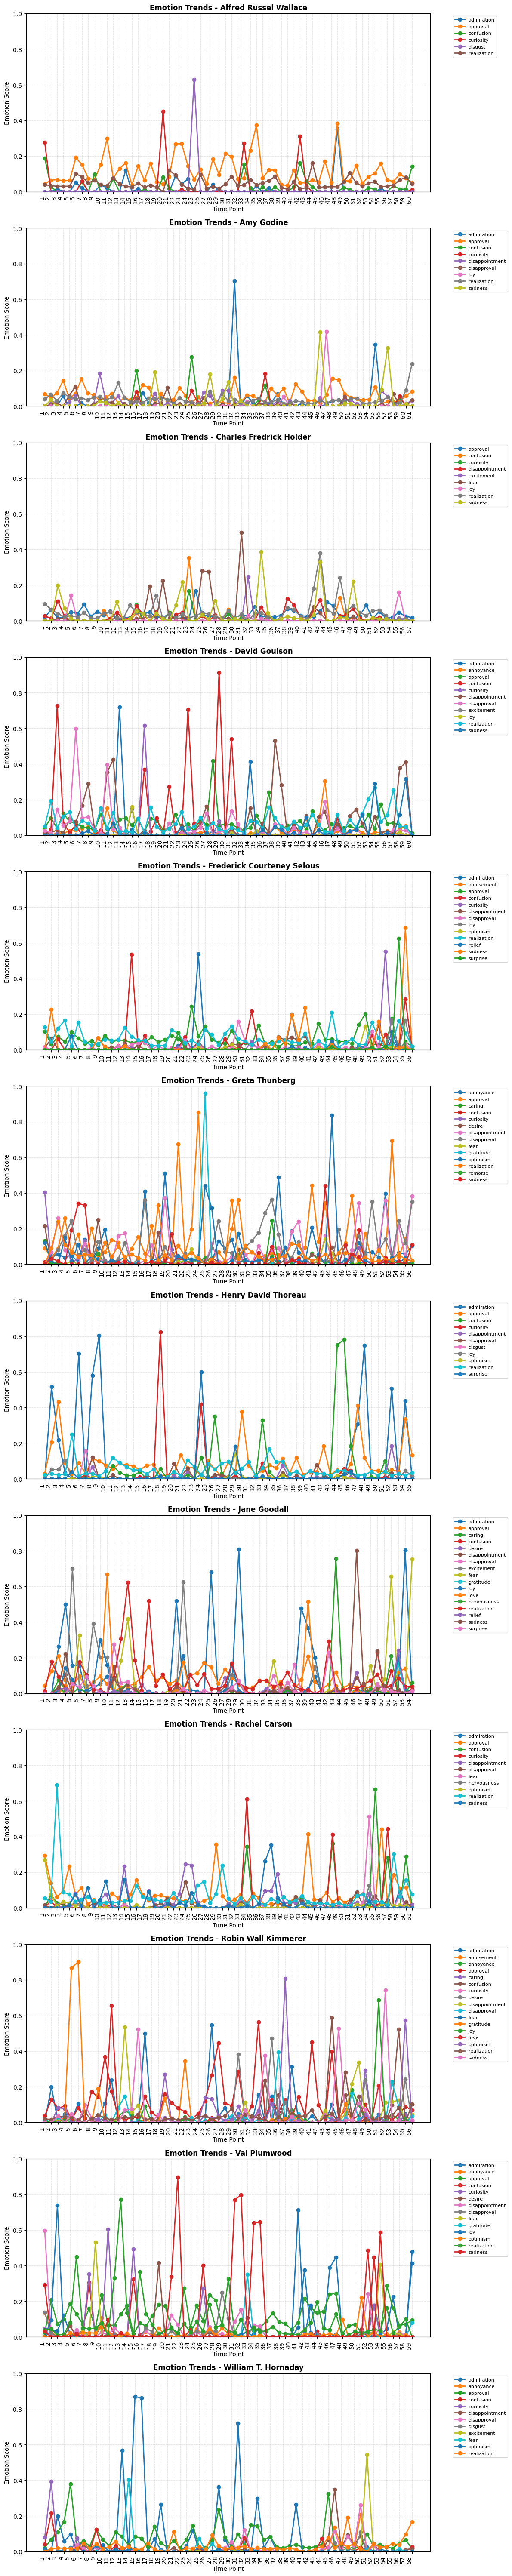

In [48]:
n_authors = len(authors_separated_chunks_scores)
fig, axes = plt.subplots(n_authors, 1, figsize=(12, 5 * n_authors))

# If there's only one author, axes won't be an array
if n_authors == 1:
    axes = [axes]

# Generate a graph for each author
for idx, (author_name, emotion_arrays) in enumerate(authors_separated_chunks_scores.items()):
    # Collect all unique emotions across all arrays, excluding 'neutral'
    # Only include emotions that have at least one score >= 0.01
    emotion_max_scores = {}
    for emotion_array in emotion_arrays:
        for emotion_obj in emotion_array:
            label = emotion_obj['label']
            score = emotion_obj['score']
            if label != 'neutral':
                if label not in emotion_max_scores:
                    emotion_max_scores[label] = score
                else:
                    emotion_max_scores[label] = max(emotion_max_scores[label], score)

    # Only include emotions where the maximum score is >= 0.01
    all_emotions = {label for label, max_score in emotion_max_scores.items() if max_score >= 0.1}

    # Sort emotions alphabetically for consistent ordering
    emotions = sorted(all_emotions)

    # Create data for each emotion across time points
    x = np.arange(len(emotion_arrays))

    # Plot a line for each emotion
    for emotion in emotions:
        values = []
        for emotion_array in emotion_arrays:
            # Find the emotion in this array
            score = 0
            for emotion_obj in emotion_array:
                if emotion_obj['label'] == emotion:
                    score = emotion_obj['score']
                    break

            # Only include if score >= 0.01
            if score < 0.01:
                score = 0
            values.append(score)

        axes[idx].plot(x, values, marker='o', label=emotion, linewidth=2, markersize=6)

    # Customize the plot
    axes[idx].set_xlabel('Time Point', fontsize=10)
    axes[idx].set_ylabel('Emotion Score', fontsize=10)
    axes[idx].set_title(f'Emotion Trends - {author_name}', fontsize=12, fontweight='bold')
    axes[idx].set_xticks(x)
    axes[idx].set_xticklabels([f'{i+1}' for i in x], rotation=90, ha='right')
    axes[idx].set_ylim(0, 1)
    axes[idx].grid(True, alpha=0.3, linestyle='--')
    axes[idx].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

    # Add horizontal line at y=0 for reference
    axes[idx].axhline(y=0, color='black', linewidth=0.8)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()